## Workshop 2


### Recap: Introduction to Python



Python is a versatile and high-level programming language that is widely used in many fields, including data science, neuroscience, and biomedical research. It is known for its flexibility, making it a great choice for both beginners and advanced users.


### Basic Python Concepts


Comments: Use  #  to write comments for better readability.


Data Types: Numbers, Strings, Lists, Tuples, Dictionaries.


Control Structures: if-else, for loops.

### Key Python Libraries


Python has a rich ecosystem of libraries that simplify various tasks:




1.NumPy – Handles numerical data and arrays efficiently.

2.Pandas – Works with structured data (tables, CSV files).


3.Matplotlib – Helps in data visualization.

4.Scipy and pingouin – Useful for scientific computations and statistics

## Introduction to Pandas for Biological Data Analysis

## Basic Concepts:
Pandas builds on top of NumPy and provides data structures like DataFrame and Series, which are essential for handling and analyzing data in biological studies. 

In [52]:
import pandas as pd


### Creating and Manipulating DataFrames


Example 1: Creating a DataFrame from Dictionary



In [125]:
import pandas as pd

# Example data: gene expression levels across samples
data = {
    'Gene': ['Gene1', 'Gene2', 'Gene3', 'Gene4'],
    'Sample1': [10.2, 8.5, 12.1, 15.3],
    'Sample2': [9.5, 7.8, 11.2, 14.5],
    'Sample3': [11.1, 9.2, 13.5, 16.2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("DataFrame:\n", df)


DataFrame:
     Gene  Sample1  Sample2  Sample3
0  Gene1     10.2      9.5     11.1
1  Gene2      8.5      7.8      9.2
2  Gene3     12.1     11.2     13.5
3  Gene4     15.3     14.5     16.2


In this example, we create a Pandas DataFrame from a dictionary representing gene expression levels across different samples. Each column represents a sample, and each row represents a gene.



### Calculating Statistics

In [59]:
# Exclude the 'Gene' column from calculations
numeric_columns = df.drop('Gene', axis=1)

# Calculate mean and standard deviation of gene expression levels
mean_expression = numeric_columns.mean()
std_expression = numeric_columns.std()

print("Mean expression across samples:\n", mean_expression)
print("\nStandard deviation of gene expression:\n", std_expression)

Mean expression across samples:
 Sample1    11.525
Sample2    10.750
Sample3    12.500
dtype: float64

Standard deviation of gene expression:
 Sample1    2.914761
Sample2    2.859487
Sample3    3.029851
dtype: float64


### Filtering and Subsetting Data

In [65]:
# Display only the gene expression patterns for Sample 1
pattern=df['Sample1']
print(pattern)

0    10.2
1     8.5
2    12.1
3    15.3
Name: Sample1, dtype: float64


In [69]:
# alternatively:
pattern=df.Sample1
print(pattern)

0    10.2
1     8.5
2    12.1
3    15.3
Name: Sample1, dtype: float64


### Plotting Data

After we have organised our data into a dataframe, we can perform multiple operations on them.

The most obvious one is to visualise them, for example:

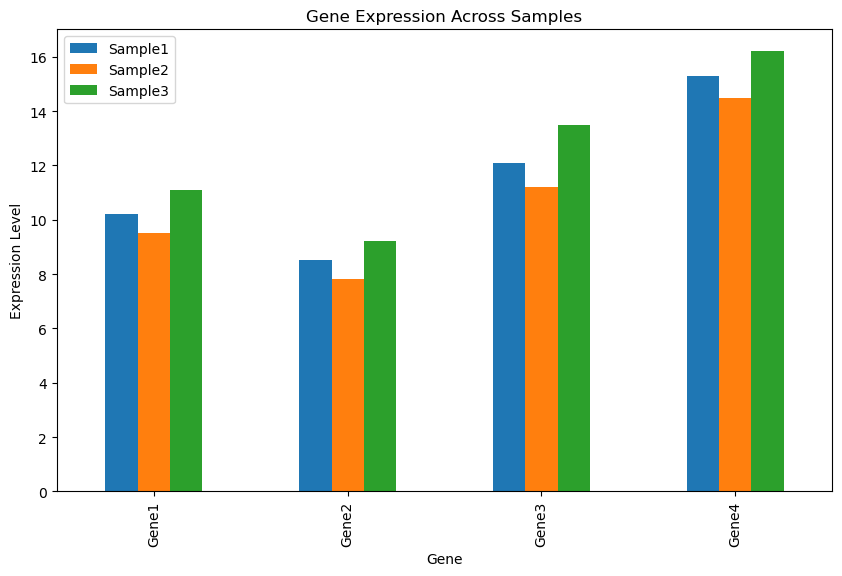

In [127]:
import matplotlib.pyplot as plt

# Plot gene expression across samples
df.plot(x='Gene', y=['Sample1', 'Sample2', 'Sample3'], kind='bar', figsize=(10, 6))
plt.xlabel('Gene')
plt.ylabel('Expression Level')
plt.title('Gene Expression Across Samples')
plt.legend(loc='upper left')
plt.show()


### In the next section, we will explore how we can create different plots (such as the one above) using Python!

 Pandas integrates well with Matplotlib for data visualization. This example demonstrates plotting gene expression levels across different samples using a bar plot, providing a visual overview of data trends.

This serves as an introduction to our next module, Matplotlip

## MatPlotlib

Matplotlib is a versatile plotting library in Python that facilitates creating a wide range of visualizations

Getting started:

In [131]:
import matplotlib as plt

### Basic Plotting with Matplotlib


### Example 1: Histogram of Gene Expression Distribution


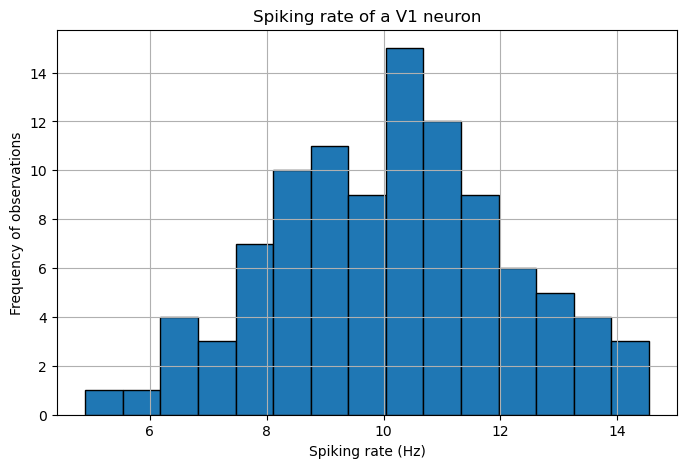

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic gene expression data
np.random.seed(0)
gene_expression = np.random.normal(loc=10, scale=2, size=100)

# Plotting
plt.figure(figsize=(8, 5))
plt.hist(gene_expression, bins=15, edgecolor='black')
plt.xlabel('Spiking rate (Hz)')
plt.ylabel('Frequency of observations')
plt.title('Spiking rate of a V1 neuron')
plt.grid(True)
plt.show()


### Excercise: Try to do the same changing the bin size (bins=....)


#### What do you observe?

### Example 2: Subplots for Comparing Multiple Conditions


In [68]:
#Simulated dataframe:
# Simulate Neuron Firing Rate Data for 3 Conditions
np.random.seed(42)
num_neurons = 100  # Number of neurons

# Simulating firing rates (spikes per second) for three conditions
condition_A = np.random.normal(loc=5, size=num_neurons)   # Baseline condition
condition_B = np.random.normal(loc=8, size=num_neurons)   # Stimulus condition
condition_C = np.random.normal(loc=12, size=num_neurons)  # Post-stimulus condition

# Create DataFrame
df = pd.DataFrame({
    'Condition_A': condition_A,
    'Condition_B': condition_B,
    'Condition_C': condition_C
})
df

,Condition_A,Condition_B,Condition_C
0,5.496714,6.584629,12.357787
1,4.861736,7.579355,12.560785
2,5.647689,7.657285,13.083051
3,6.523030,7.197723,13.053802
4,4.765847,7.838714,10.622331
...,...,...,...
95,3.536485,8.385317,11.307090
96,5.296120,7.116143,12.899600
97,5.261055,8.153725,12.307300
98,5.005113,8.058209,12.812862


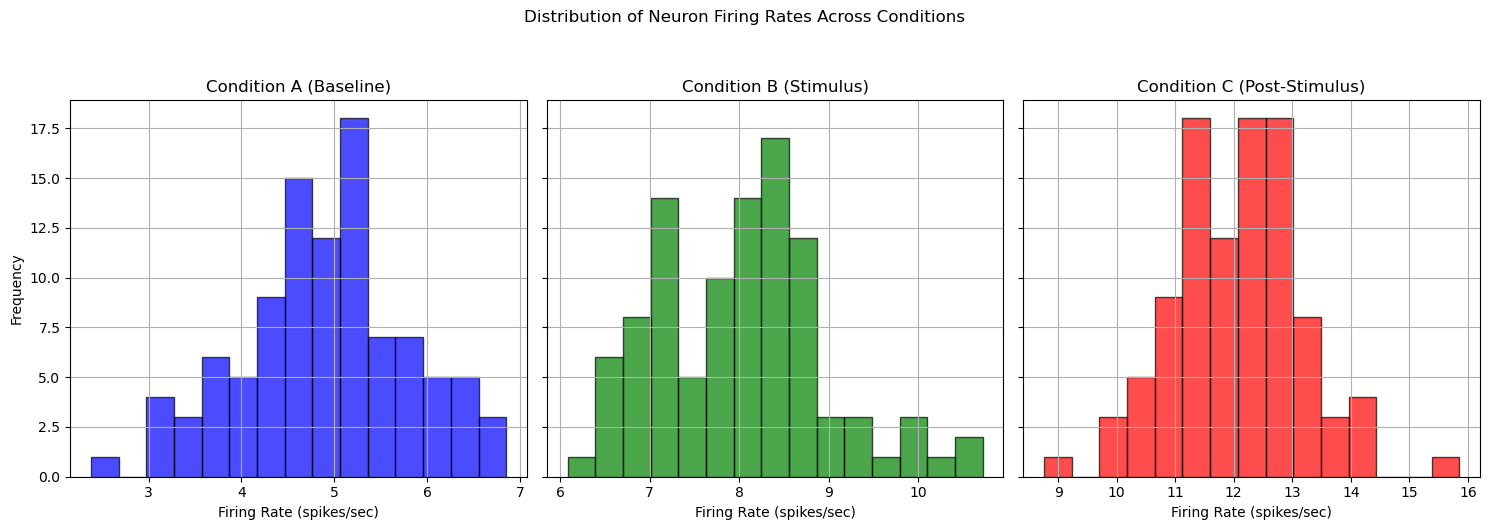

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot Histograms for Each Condition
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axs[0].hist(df['Condition_A'], bins=15, edgecolor='black', alpha=0.7, color='b')
axs[0].set_title('Condition A (Baseline)')
axs[0].set_xlabel('Firing Rate (spikes/sec)')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

axs[1].hist(df['Condition_B'], bins=15, edgecolor='black', alpha=0.7, color='g')
axs[1].set_title('Condition B (Stimulus)')
axs[1].set_xlabel('Firing Rate (spikes/sec)')
axs[1].grid(True)

axs[2].hist(df['Condition_C'], bins=15, edgecolor='black', alpha=0.7, color='r')
axs[2].set_title('Condition C (Post-Stimulus)')
axs[2].set_xlabel('Firing Rate (spikes/sec)')
axs[2].grid(True)

plt.suptitle('Distribution of Neuron Firing Rates Across Conditions', y=1.05)
plt.tight_layout()
plt.show()


This example illustrates using Matplotlib to create subplots (axs) for comparing distributions of neuron firing rates across different conditions . Shared y-axis (sharey=True) ensures consistent scaling across subplots.

#### Do you think the data are normally distributed (from visual inspection alone)

#### We can check for normality:

### Shapiro-Wilk test 

For the Shapiro test we will use another library with useful statistical tools, called scipy:


In [56]:
from scipy.stats import shapiro


In [57]:

# Perform Shapiro-Wilk normality test for each condition
stat_A, p_A = shapiro(df['Condition_A'])
if p_A < 0.05:
    print("Condition A is NOT normally distributed.")
else:
    print("Condition A is normally distributed.")

stat_B, p_B = shapiro(df['Condition_B'])
if p_B < 0.05:
    print("Condition B is NOT normally distributed.")
else:
    print("Condition B is normally distributed.")

stat_C, p_C = shapiro(df['Condition_C'])
if p_C < 0.05:
    print("Condition C is NOT normally distributed.")
else:
    print("Condition C is normally distributed.")

    

Condition A is normally distributed.
Condition B is normally distributed.
Condition C is normally distributed.


### What kind of plot is suitable for our data?

### 1st option: Barplot

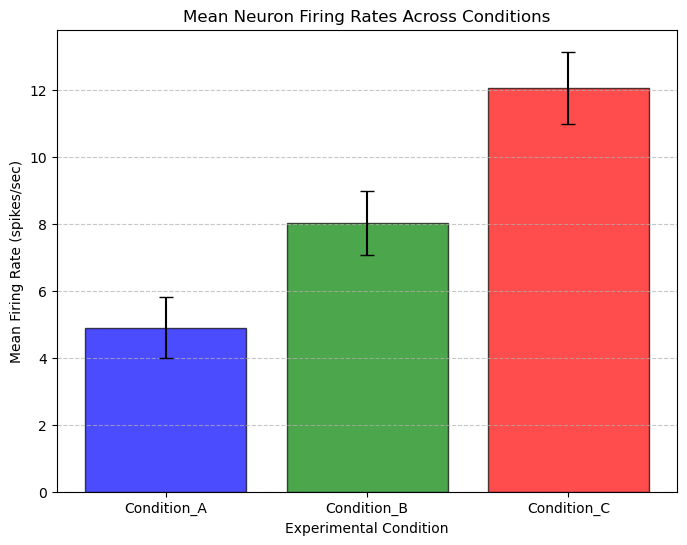

In [58]:
#Step 1: Calculate Mean and Standard Deviation
means = df.mean()
std_devs = df.std()

# Step 2: Create Bar Plot with Error Bars
plt.figure(figsize=(8, 6))
plt.bar(means.index, means.values, yerr=std_devs.values, capsize=5, color=['b', 'g', 'r'], alpha=0.7, edgecolor='black')
plt.xlabel('Experimental Condition')
plt.ylabel('Mean Firing Rate (spikes/sec)')
plt.title('Mean Neuron Firing Rates Across Conditions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





### 2nd option: Boxplot

### Boxplots

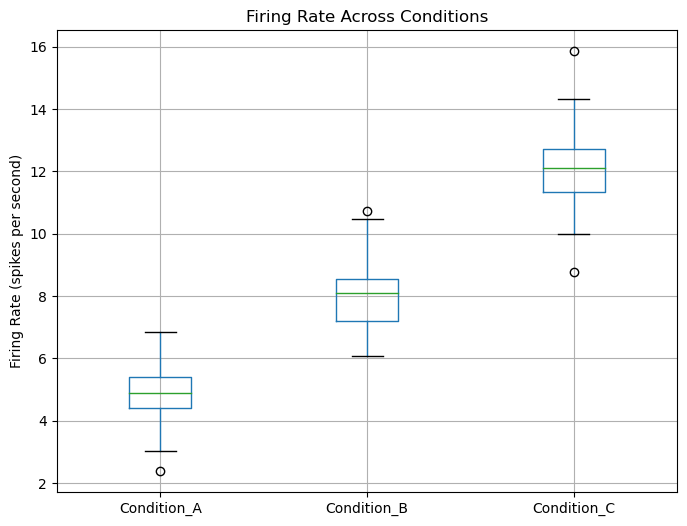

In [70]:
plt.figure(figsize=(8, 6))
df.boxplot(column=['Condition_A', 'Condition_B', 'Condition_C'])

# Adding labels and title
plt.ylabel('Firing Rate (spikes per second)')
plt.title('Firing Rate Across Conditions')

# Display the plot
plt.show()

## Introduction to statistics with python

We can apply statistical tests in python using the pingouin library

The pingouin library is not preinstalled in our environment, so we need to install it before importing it.

In [33]:
pip install pingouin

  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/eb/56/6d3607f3a78aee1de8e5466f5171722c8e344266a12dc44ccb73d024b3b3/pingouin-0.5.5-py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/67/1a/bfb5574b215f530c7ac5be684f33d60b299abbebd763c203aa31755f2fb2/pandas_flavor-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.2 from https://files.pythonhosted.org/packages/49/81/91585dc83ec81dcd52e934f6708bf350b06949d8bfa13bf3b711b851c3f4/scikit_learn-1.3.2-cp38-cp38-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata
  Obtaining dependency information for tabulate from https://files.pythonhosted.org/packages/40/44/4a5f08c96eb108af5cb50b41f76142f0afa346dfa99d5296fe7202a11854/tabulate-0.9.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [34]:
import pingouin as pn

### a. One way ANOVA


Let's assume we're measuring blood glucose levels (mg/dL) in three different groups of patients:

Healthy individuals



Pre-diabetic individuals


Diabetic individuals

In [5]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt

# Simulating biological data for blood glucose levels in 3 groups
np.random.seed(42)

groups = ['Healthy', 'Pre-Diabetic', 'Diabetic']
data = {
    'Group': np.repeat(groups, 50),  # 50 samples per group
    'Glucose_Level': np.concatenate([
        np.random.normal(loc=90, scale=10, size=50),   # Healthy (normal glucose)
        np.random.normal(loc=110, scale=12, size=50),  # Pre-Diabetic (elevated glucose)
        np.random.normal(loc=140, scale=15, size=50)   # Diabetic (high glucose)
    ])
}

df = pd.DataFrame(data)
df

,Group,Glucose_Level
0,Healthy,94.967142
1,Healthy,88.617357
2,Healthy,96.476885
3,Healthy,105.230299
4,Healthy,87.658466
...,...,...
145,Diabetic,151.727343
146,Diabetic,121.445739
147,Diabetic,120.193151
148,Diabetic,147.829123


#### Can we perform ANOVA?

#### One of the conditions that needs to be met is the condition of normality.

#### Is normality violated? 

### Shapiro-Wilk test

In [6]:

#this is the dataset in a configuration more conducive to perform the Shapiro test:
df['Subject'] = df.groupby('Group').cumcount()  # Create a sample ID for each group
data = df.pivot(index='Subject', columns='Group', values='Glucose_Level').reset_index()

#Perform the Shapiro test on the dataset "data" to check for normality. Remember, we have 3 conditions: 
#Healthy, Pre-Diabetic and Diabetic (Enter your code below):











In [7]:

# Performing one-way ANOVA
anova_results = pg.anova(dv='Glucose_Level', between='Group', data=df)

# Display results
print(anova_results)


  Source  ddof1  ddof2          F         p-unc       np2
0  Group      2    147  234.51826  1.827045e-46  0.761378


But... which pairwise comparisons are statistically significant?

### c. Post - Hoc tests (Tukey’s HSD)

In [8]:
# Performing Tukey's HSD post-hoc test
posthoc_results = pg.pairwise_tukey(data=df, dv='Glucose_Level', between='Group')

# Display results
posthoc_results


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Diabetic,Healthy,139.410686,87.745261,51.665426,2.39233,21.596277,2.131628e-14,4.058481
1,Diabetic,Pre-Diabetic,139.410686,110.213370,29.197316,2.39233,12.204551,2.131628e-14,2.215418
2,Healthy,Pre-Diabetic,87.745261,110.213370,-22.468109,2.39233,-9.391726,2.164935e-14,-2.245039


What if the assumption of normality was violated?

We would perform Kruskal-Wallis instead:

### d. Kruskal-Wallis

In [9]:
kruskal_results = pg.kruskal(dv='Glucose_Level', between='Group', data=df)
kruskal_results

,Source,ddof1,H,p-unc
Kruskal,Group,2,118.591979,1.770431e-26


### Note: In this case, tha data were presented in the long form: 

There was one column storing all the glucose values and a column called "Group" specifying the population from which the values where drawn

In [172]:
 df

,Group,Glucose_Level
0,Healthy,94.967142
1,Healthy,88.617357
2,Healthy,96.476885
3,Healthy,105.230299
4,Healthy,87.658466
...,...,...
145,Diabetic,151.727343
146,Diabetic,121.445739
147,Diabetic,120.193151
148,Diabetic,147.829123


What if the data where stored in 3 columns instead? One for each condition:

In [181]:
import numpy as np
import pandas as pd

# Simulating biological data for blood glucose levels in 3 groups
np.random.seed(42)

num_samples = 50  # Number of samples per group

# Generate synthetic data
healthy = np.random.normal(loc=90, scale=10, size=num_samples)   # Healthy (normal glucose)
prediabetic = np.random.normal(loc=110, scale=12, size=num_samples)  # Pre-Diabetic (elevated glucose)
diabetic = np.random.normal(loc=140, scale=15, size=num_samples)   # Diabetic (high glucose)

# Create a DataFrame in wide format
df_wide = pd.DataFrame({
    'Healthy': healthy,
    'Pre-Diabetic': prediabetic,
    'Diabetic': diabetic
})

# Display the DataFrame
df_wide.head()


,Healthy,Pre-Diabetic,Diabetic
0,94.967142,113.889008,118.769439
1,88.617357,105.379013,133.690320
2,96.476885,101.876936,134.859282
3,105.230299,117.340115,127.965841
4,87.658466,122.371994,137.580714


In that case, in order to perform ANOVA/Kruskal-Wallis we need to convert the data to the long format before running the respective scripts:

You can do that using the pd.melt() function:

In [184]:
# Convert the wide-format DataFrame to long format
df_long = df_wide.melt(var_name='Group', value_name='Glucose_Level')

# Display the transformed long-format DataFrame
print(df_long)


        Group  Glucose_Level
0     Healthy      94.967142
1     Healthy      88.617357
2     Healthy      96.476885
3     Healthy     105.230299
4     Healthy      87.658466
..        ...            ...
145  Diabetic     151.727343
146  Diabetic     121.445739
147  Diabetic     120.193151
148  Diabetic     147.829123
149  Diabetic     144.454770

[150 rows x 2 columns]


# Excercise

These are some simulated data: 50 subjects and 3 conditions (only the first 5 rows/subjects are visualised in the table below)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import shapiro

# Simulate Data for 50 Subjects in 3 Conditions
np.random.seed(123)
num_subjects = 50
subject_ids = np.arange(1, num_subjects + 1)
condition_A = np.random.normal(loc=100, scale=15, size=num_subjects)  # Baseline Condition A
condition_B = np.random.normal(loc=110, scale=15, size=num_subjects)  # Condition B
condition_C = np.random.normal(loc=130, scale=20, size=num_subjects)  # Condition C

# Create DataFrame
data = pd.DataFrame({
    'Condition_A': condition_A,
    'Condition_B': condition_B,
    'Condition_C': condition_C
})
data.head(5)

,Condition_A,Condition_B,Condition_C
0,83.715541,90.588720,142.841094
1,114.960182,94.418177,90.442241
2,104.244677,136.155683,144.245293
3,77.405579,98.029059,181.966079
4,91.320996,110.445248,129.507480


#### 1. Calculate the mean value per condition 


hint: you can use np.mean that we introduced in the previous workshop, OR use the PANDAS function for mean we introduced in this workshop

#### 2. Plot the histogram for each condition. (Note: visualise the three histograms as subplots of the same figure)

Through visual inspection alone, are the data normally distributed?

#### 3. Perform the appropriate statistical test to check for normality and report your results

#### 4 a. Use the appropriate statistical test to compare the 3 conditions. (hint: remeber to configure your dataset in the correct format!)  

#### b. If the comparison is significant, identify the pairwise comparisons that are statistically significant  

#### 5. Create a boxplot to visualise the median value for each condition